In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

In [76]:
data = pd.read_csv("../00_data/data_with_calc_fields.csv", sep=";", decimal=",", index_col="datetime")
data.index = pd.to_datetime(data.index)

In [77]:
data[["day_ahead_price", "intraday_price"]].describe()

,day_ahead_price,intraday_price
count,17542.000000,17542.000000
mean,31.588521,31.760971
std,15.483638,16.573758
min,-130.090000,-155.520000
25%,24.010000,23.912500
50%,31.070000,31.300000
75%,38.100000,38.747500
max,163.520000,200.430000


C:\Users\Laura\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


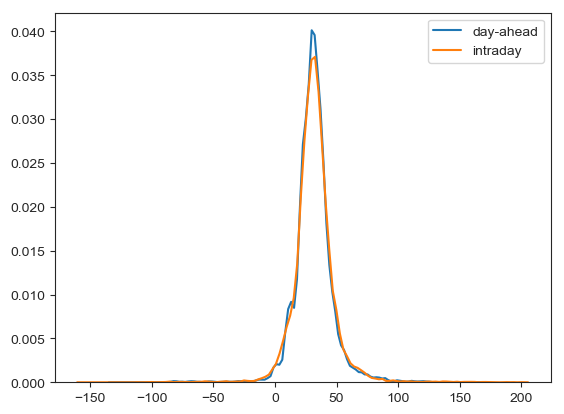

In [78]:
sns.kdeplot(data["day_ahead_price"], label="day-ahead")
sns.kdeplot(data["intraday_price"], label="intraday")


C:\Users\Laura\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


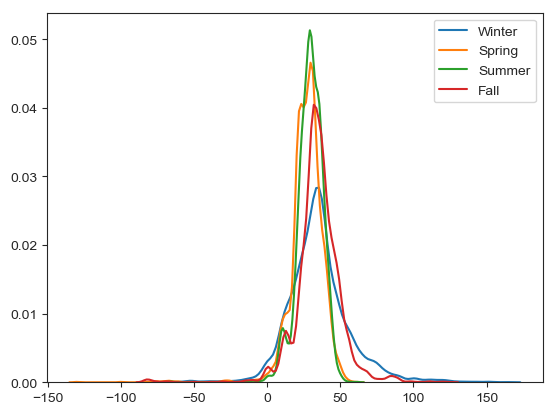

In [79]:
seasons = [ "Winter", "Spring", "Summer", "Fall"]
for i in range(4):
    sns.kdeplot(data.loc[(data.season==i),"day_ahead_price"], label=seasons[i])


C:\Users\Laura\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


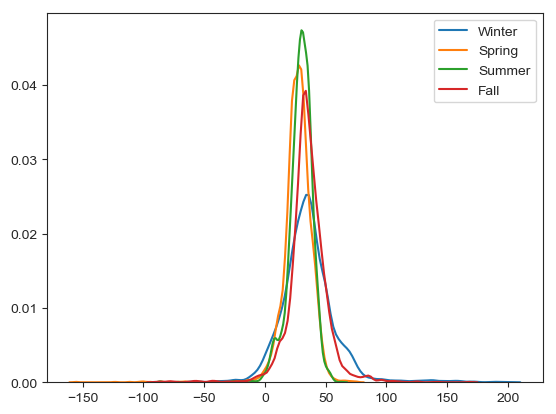

In [80]:
for i in range(4):
    sns.kdeplot(data.loc[(data.season==i),"intraday_price"], label=seasons[i])

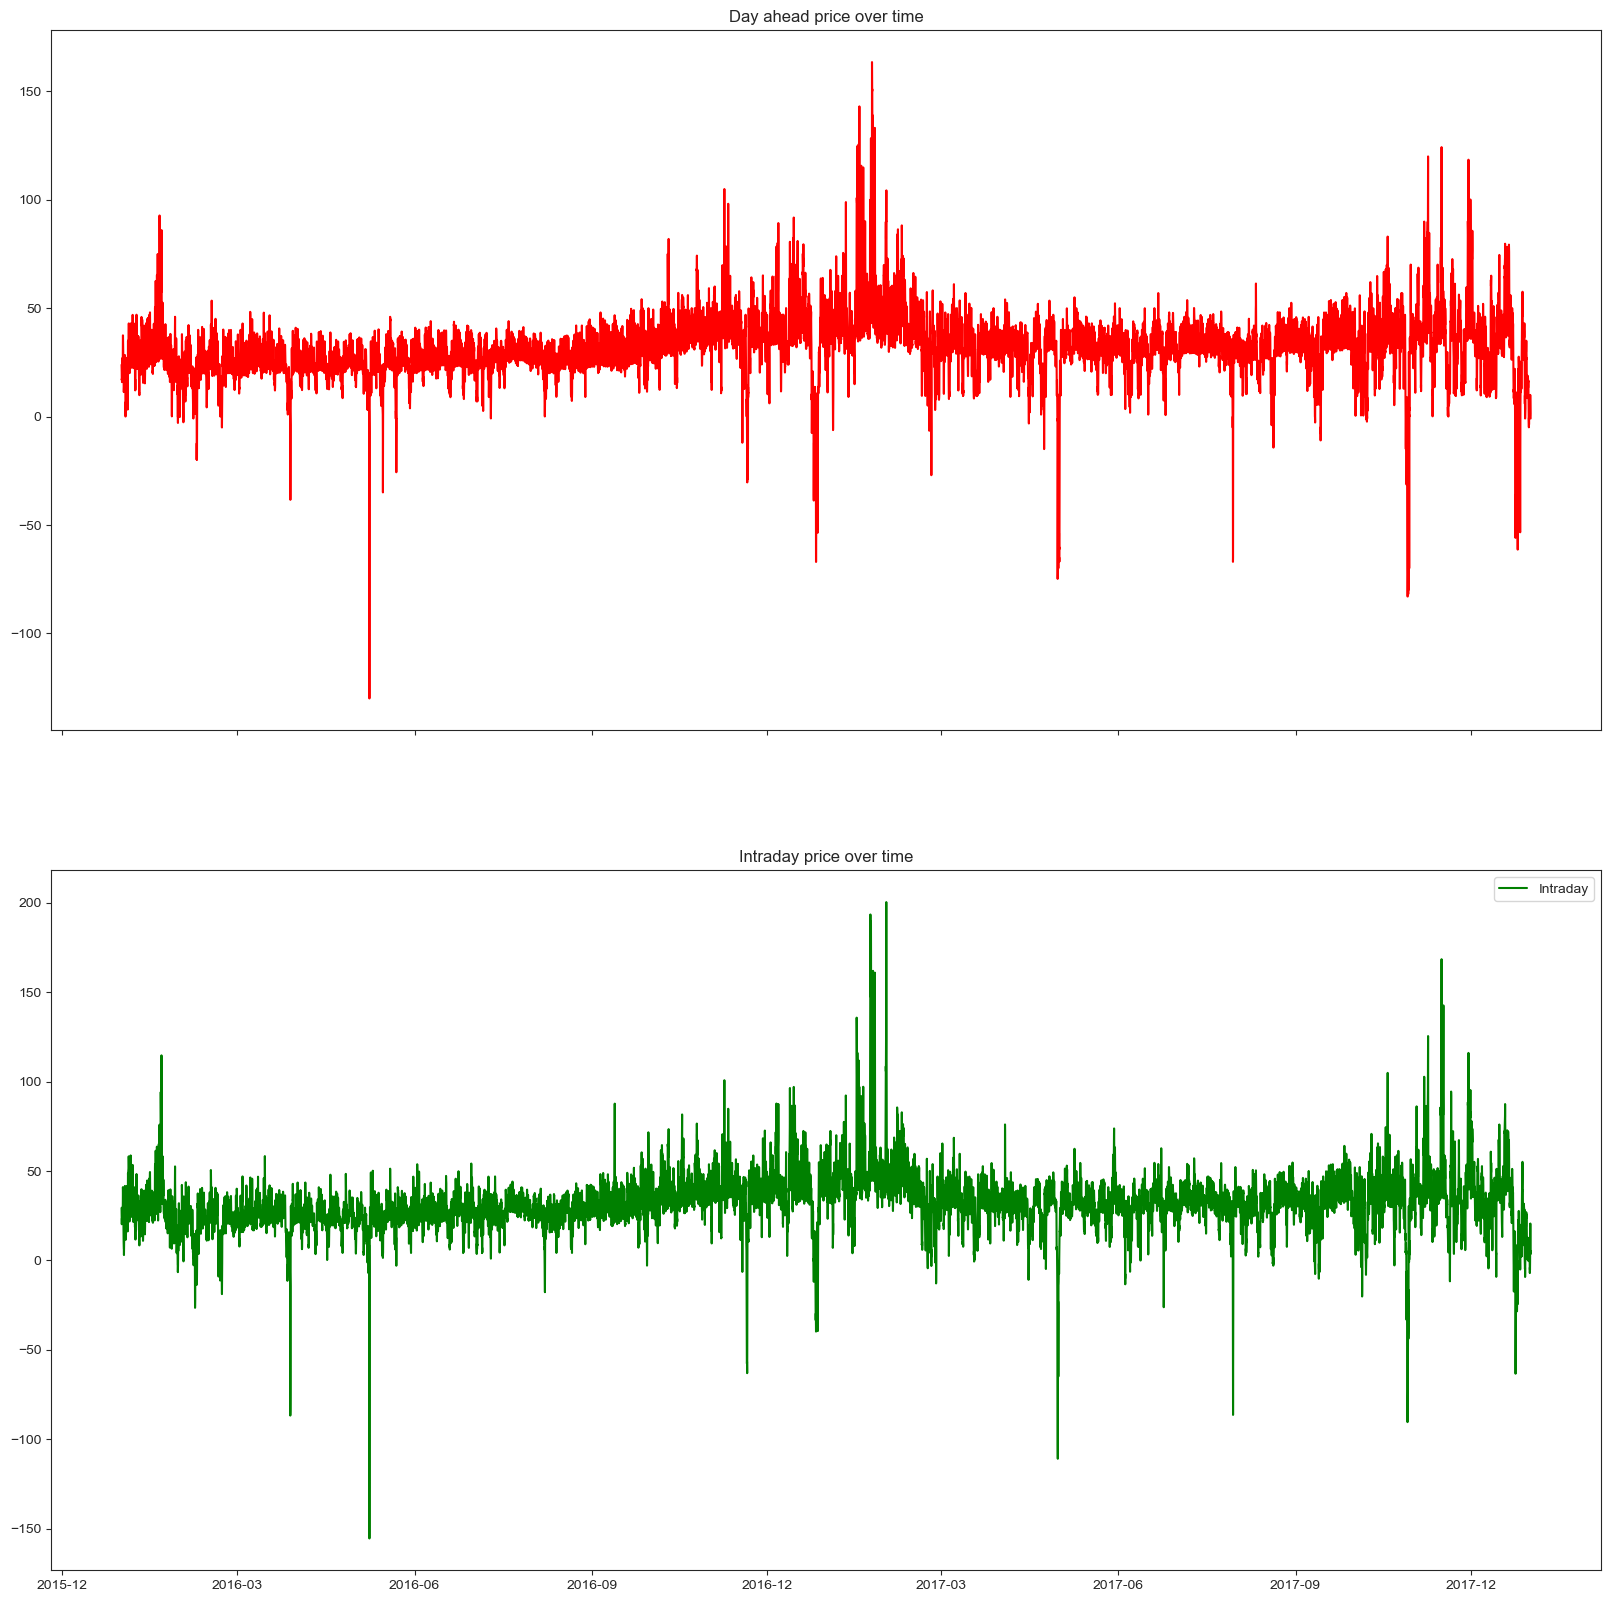

In [81]:
x = data.index
y1 = data["day_ahead_price"]
y2 = data["intraday_price"]

f, (ax, ax1) = plt.subplots(2, 1, figsize=(20, 20), sharex=True)
ax.plot(x, y1, label="Day ahead", c="r")
ax.set_title("Day ahead price over time")

ax1.plot(x, y2, label="Intraday", c="g")
ax1.set_title("Intraday price over time")

plt.legend()


In [82]:
data["year"] = data["date"].map(lambda x: datetime.strptime(x, '%Y-%m-%d').strftime('%Y'))
print (data[["day_ahead_price", "intraday_price"]].groupby(data["year"]).mean())

      day_ahead_price  intraday_price
year                                 
2016        28.982276       29.246830
2017        34.201907       34.282001


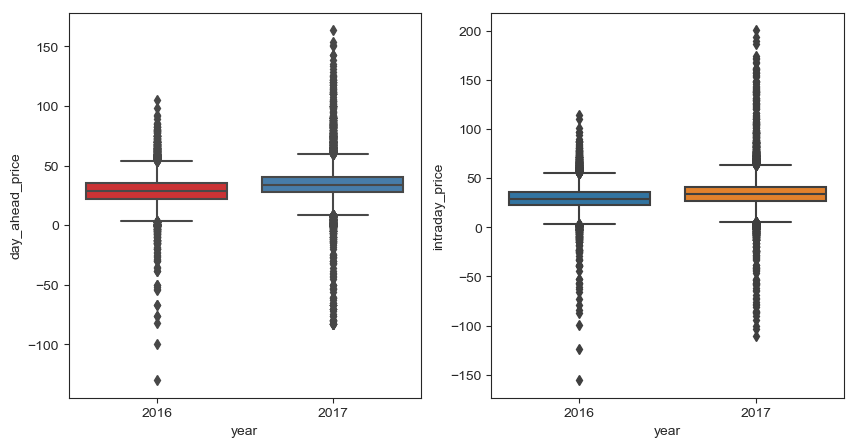

In [84]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(x="year", y="day_ahead_price", data=data,  palette="Set1", ax=ax1)
sns.boxplot(x="year", y="intraday_price", data=data, ax=ax2)

       day_ahead_price  intraday_price
count       366.000000      366.000000
mean         31.577152       31.754112
std           9.070826        9.414995
min          -8.420000       -3.642917
25%          27.332969       27.752292
50%          31.347188       31.470000
75%          35.027344       35.271146
max          64.133333       70.020833


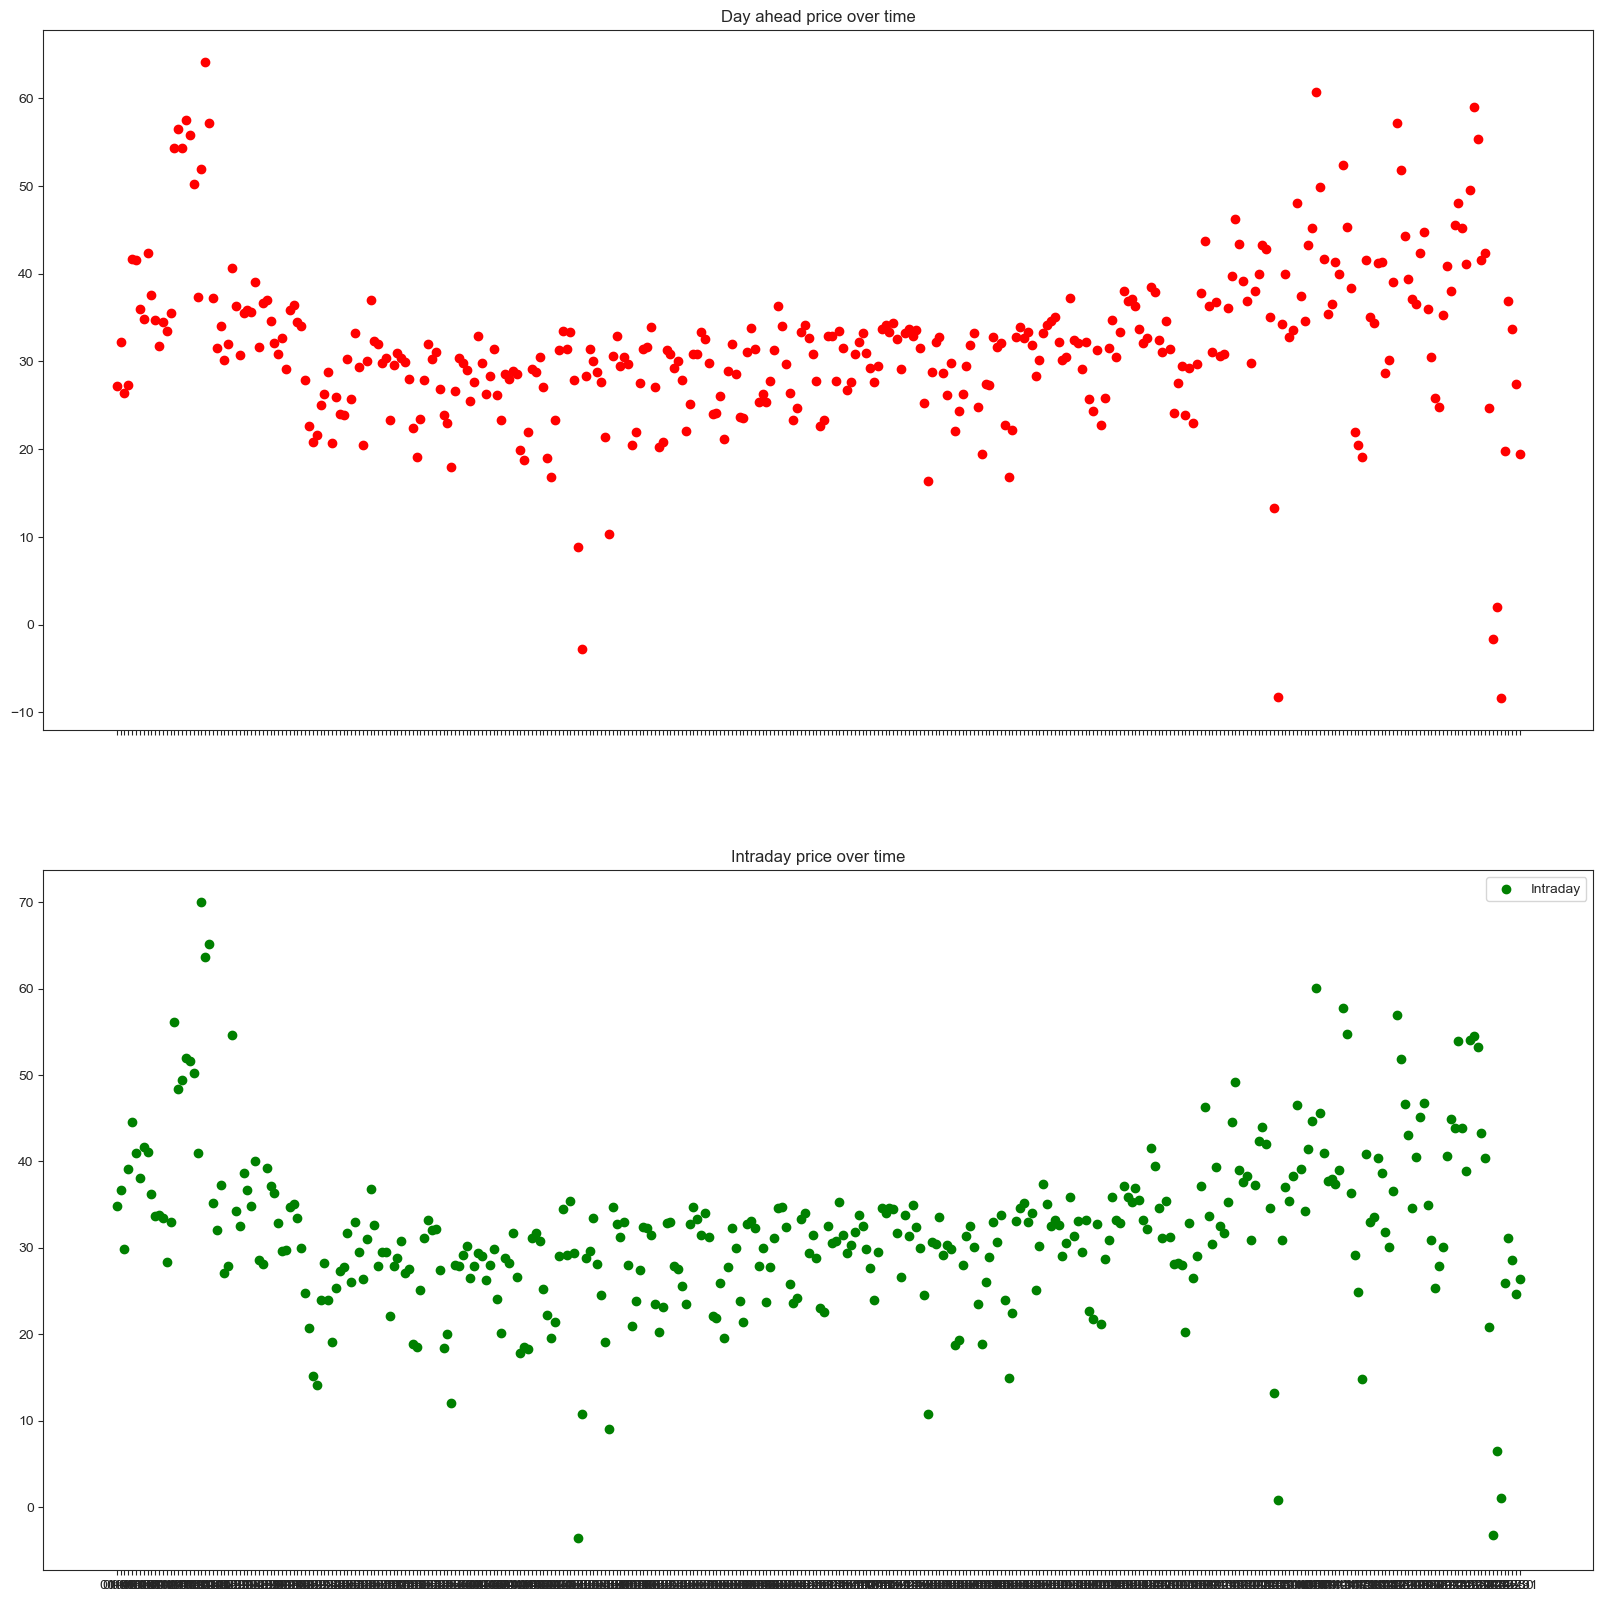

In [87]:
data["date_without_year"] = data["date"].map(lambda x: datetime.strptime(x, '%Y-%m-%d').strftime('%m-%d'))
data_grouped_date_w_year = data.groupby([data['date_without_year']]).mean()
#data_grouped_date_w_year.index = pd.to_datetime(data_grouped_date_w_year.index)
print(data_grouped_date_w_year[["day_ahead_price", "intraday_price"]].describe())
x = data_grouped_date_w_year.index
y1 = data_grouped_date_w_year["day_ahead_price"]
y2 = data_grouped_date_w_year["intraday_price"]

f, (ax, ax1) = plt.subplots(2, 1, figsize=(20, 20), sharex=True)
ax.scatter(x, y1, label="Day ahead", c="r")
ax.set_title("Day ahead price over time")

ax1.scatter(x, y2, label="Intraday", c="g")
ax1.set_title("Intraday price over time")

plt.legend()
plt.show()

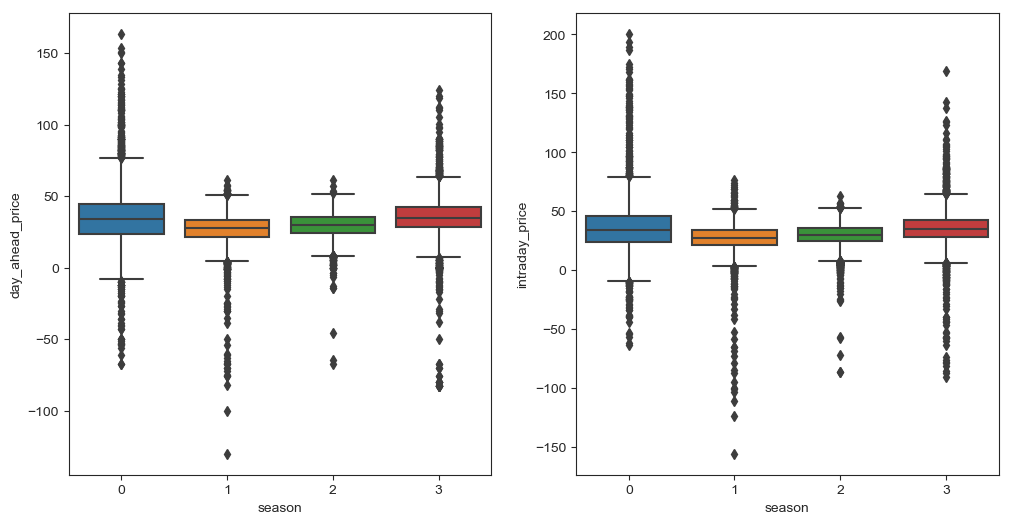

In [88]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x="season", y="day_ahead_price", data=data, ax=ax1)
sns.boxplot(x="season", y="intraday_price", data=data, ax=ax2)

In [89]:
data_grouped_season = data[['season','day_ahead_price','intraday_price']].groupby([data['season']])
print(data_grouped_season[['day_ahead_price', 'intraday_price']].describe())

       day_ahead_price                                                 \
                 count       mean        std     min      25%     50%   
season                                                                  
0               4344.0  35.296041  21.146306  -67.09  23.2375  33.940   
1               4414.0  27.020156  11.738288 -130.09  21.7300  27.950   
2               4416.0  29.325768   8.811839  -67.05  24.4700  29.830   
3               4368.0  34.805465  15.818778  -83.06  28.2375  34.645   

                        intraday_price                                         \
            75%     max          count       mean        std     min      25%   
season                                                                          
0       44.7125  163.52         4344.0  35.748826  22.618453  -63.37  23.5075   
1       33.2300   61.05         4414.0  26.958555  12.698951 -155.52  21.4625   
2       35.2150   61.36         4416.0  29.266927  10.179365  -86.41  24.4075   
3 

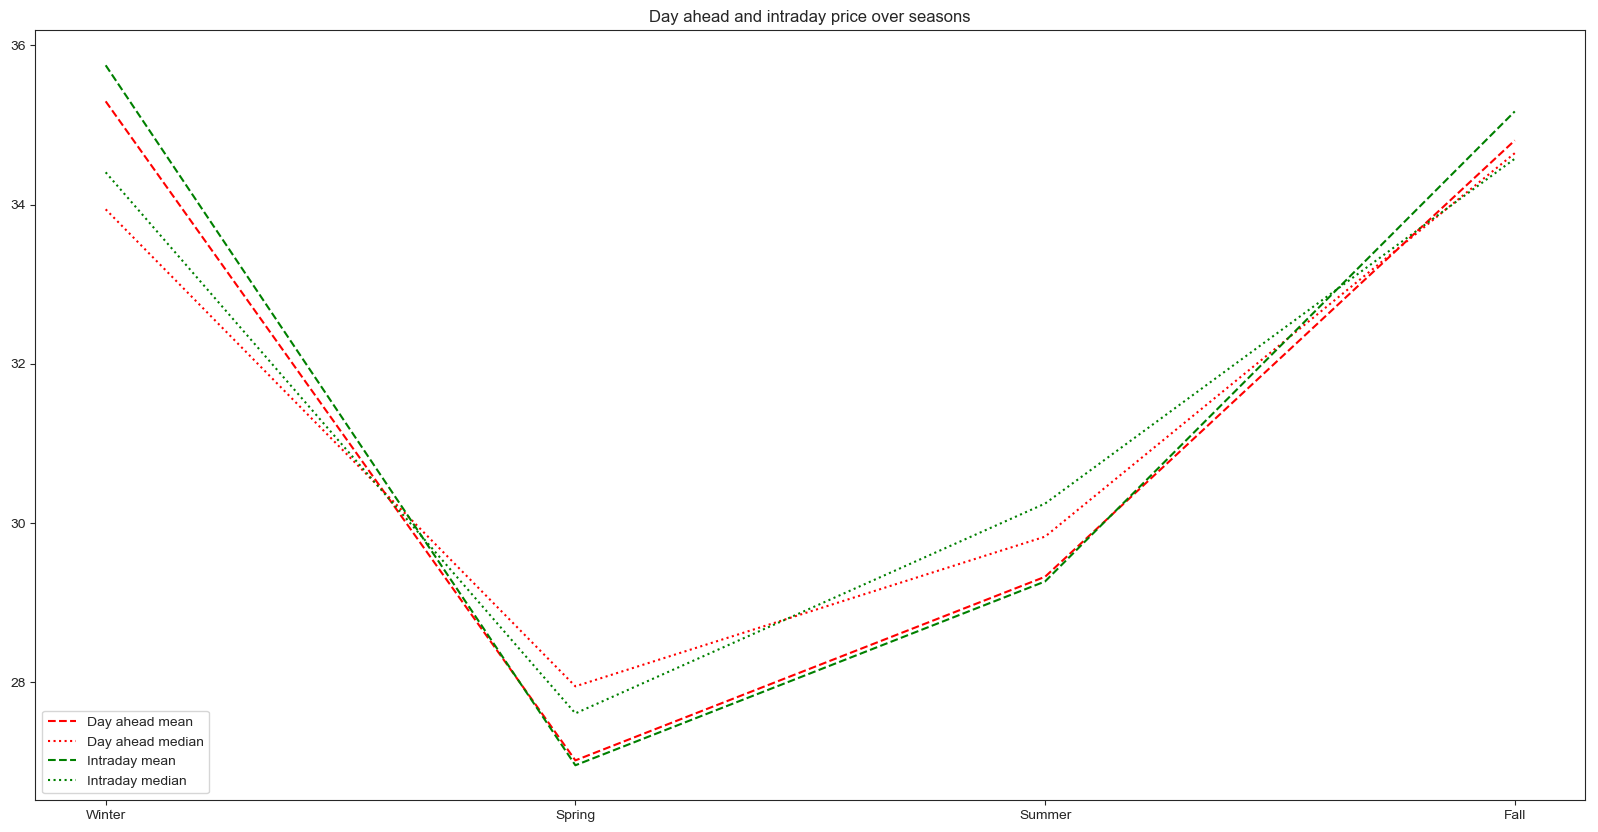

In [90]:
data_grouped_season_mean = data_grouped_season.mean()
data_grouped_season_median = data_grouped_season.median()
data_grouped_season_min = data_grouped_season.min()
data_grouped_season_max = data_grouped_season.max()
x = data_grouped_season_mean.index
y1 = data_grouped_season_min["day_ahead_price"]
y2 = data_grouped_season_mean["day_ahead_price"]
y3 = data_grouped_season_median["day_ahead_price"]
y4 = data_grouped_season_max["day_ahead_price"]
y5 = data_grouped_season_min["intraday_price"]
y6 = data_grouped_season_mean["intraday_price"]
y7 = data_grouped_season_median["intraday_price"]
y8 = data_grouped_season_max["intraday_price"]
f, (ax) = plt.subplots(1, 1, figsize=(20, 10), sharex=True)
#ax.plot(x, y1, label="Day ahead", c="r", linestyle='--')
ax.plot(x, y2, label="Day ahead mean", c="r", linestyle='--')
ax.plot(x, y3, label="Day ahead median", c="r", linestyle=':')
#ax.plot(x, y4, label="Day ahead", c="r", linestyle='--')
#ax.plot(x, y5, label="Intraday", c="g", linestyle='--')
ax.plot(x, y6, label="Intraday mean", c="g", linestyle='--')
ax.plot(x, y7, label="Intraday median", c="g", linestyle=':')
#ax.plot(x, y8, label="Intraday", c="g", linestyle='--')
ax.set_title("Day ahead and intraday price over seasons")
plt.xticks(np.arange(4), seasons)
plt.legend()
plt.show()

In [91]:
data_grouped_month = data[['month','day_ahead_price','intraday_price']].groupby([data['month']])
#print(data_grouped_month[['day_ahead_price', 'intraday_price']].describe())

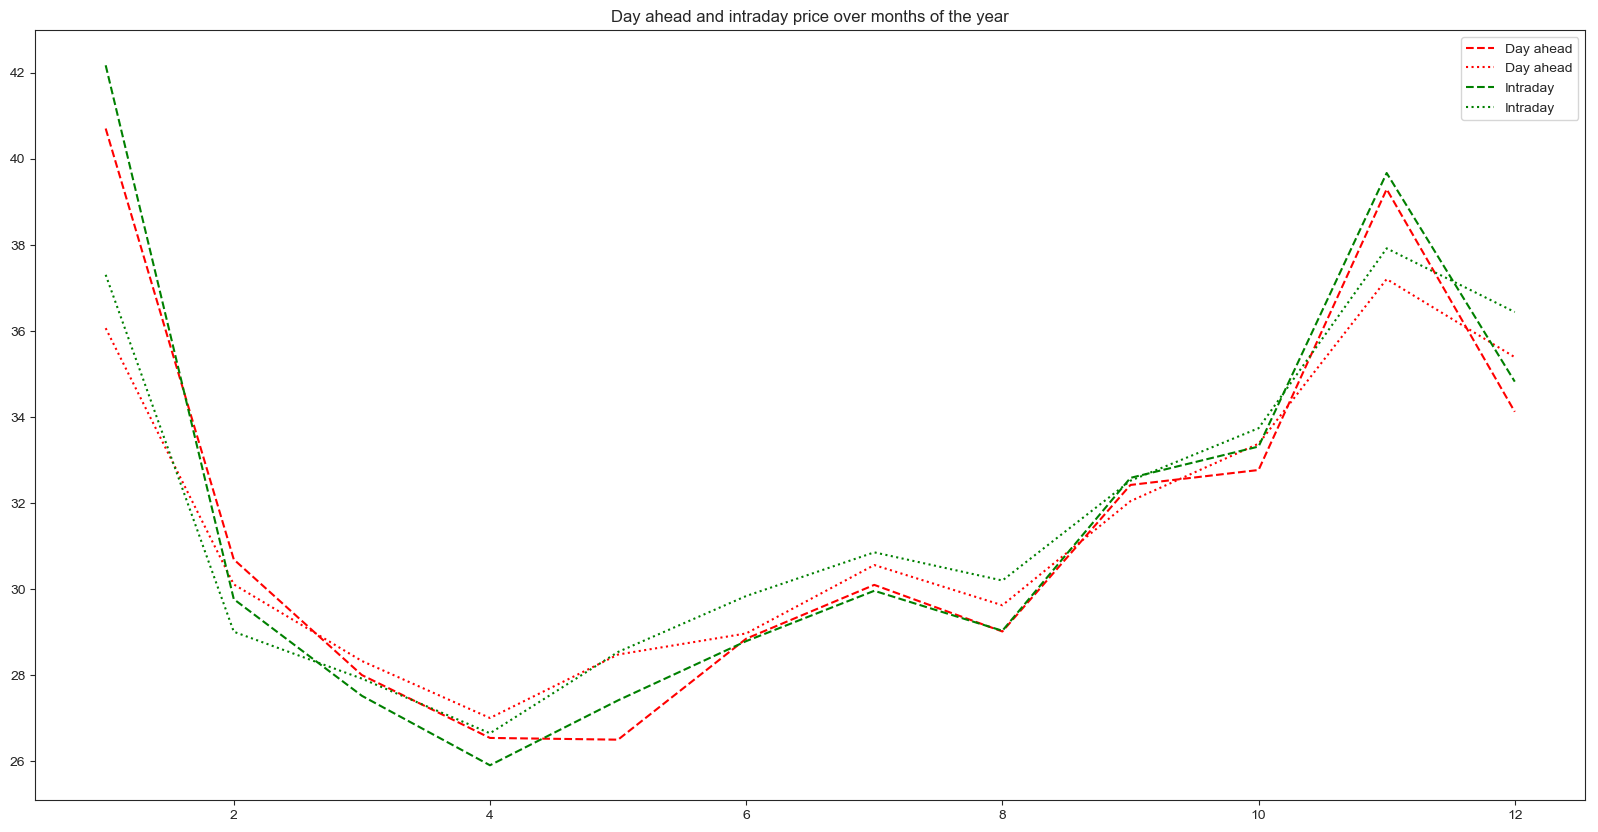

In [92]:
data_grouped_month_mean = data_grouped_month.mean()
data_grouped_month_median = data_grouped_month.median()
data_grouped_month_min = data_grouped_month.min()
data_grouped_month_max = data_grouped_month.max()
x = data_grouped_month_mean.index
y1 = data_grouped_month_min["day_ahead_price"]
y2 = data_grouped_month_mean["day_ahead_price"]
y3 = data_grouped_month_median["day_ahead_price"]
y4 = data_grouped_month_max["day_ahead_price"]
y5 = data_grouped_month_min["intraday_price"]
y6 = data_grouped_month_mean["intraday_price"]
y7 = data_grouped_month_median["intraday_price"]
y8 = data_grouped_month_max["intraday_price"]

f, (ax) = plt.subplots(1, 1, figsize=(20, 10), sharex=True)
#ax.plot(x, y1, label="Day ahead", c="r", linestyle='--')
ax.plot(x, y2, label="Day ahead", c="r", linestyle='--')
ax.plot(x, y3, label="Day ahead", c="r", linestyle=':')
#ax.plot(x, y4, label="Day ahead", c="r", linestyle='--')
#ax.plot(x, y5, label="Intraday", c="g", linestyle='--')
ax.plot(x, y6, label="Intraday", c="g", linestyle='--')
ax.plot(x, y7, label="Intraday", c="g", linestyle=':')
#ax.plot(x, y8, label="Intraday", c="g", linestyle='--')
ax.set_title("Day ahead and intraday price over months of the year")

plt.legend()
plt.show()

In [93]:
data_grouped_hour = data[['hour','day_ahead_price','intraday_price']].groupby([data['hour']])
print (data_grouped_hour[['day_ahead_price', 'intraday_price']].mean().sort_values(by=['day_ahead_price']))

      day_ahead_price  intraday_price
hour                                 
3           22.137798       22.257182
4           22.597155       22.436648
2           22.765556       23.263827
1           23.902025       24.407825
5           24.319152       24.379097
0           25.663434       26.142038
23          27.410287       28.199562
14          29.626170       30.041464
6           29.663653       29.789699
13          30.403598       30.661532
15          30.811081       31.036457
22          32.001518       32.316676
12          32.152955       32.352107
16          32.792517       32.994911
21          33.792476       33.620588
11          34.670246       34.647031
10          35.340342       35.611122
7           36.130917       35.975103
9           37.091163       37.256840
20          37.319904       37.046922
17          37.871491       37.971245
8           38.200287       38.319439
18          40.617018       40.791532
19          40.819617       40.721218


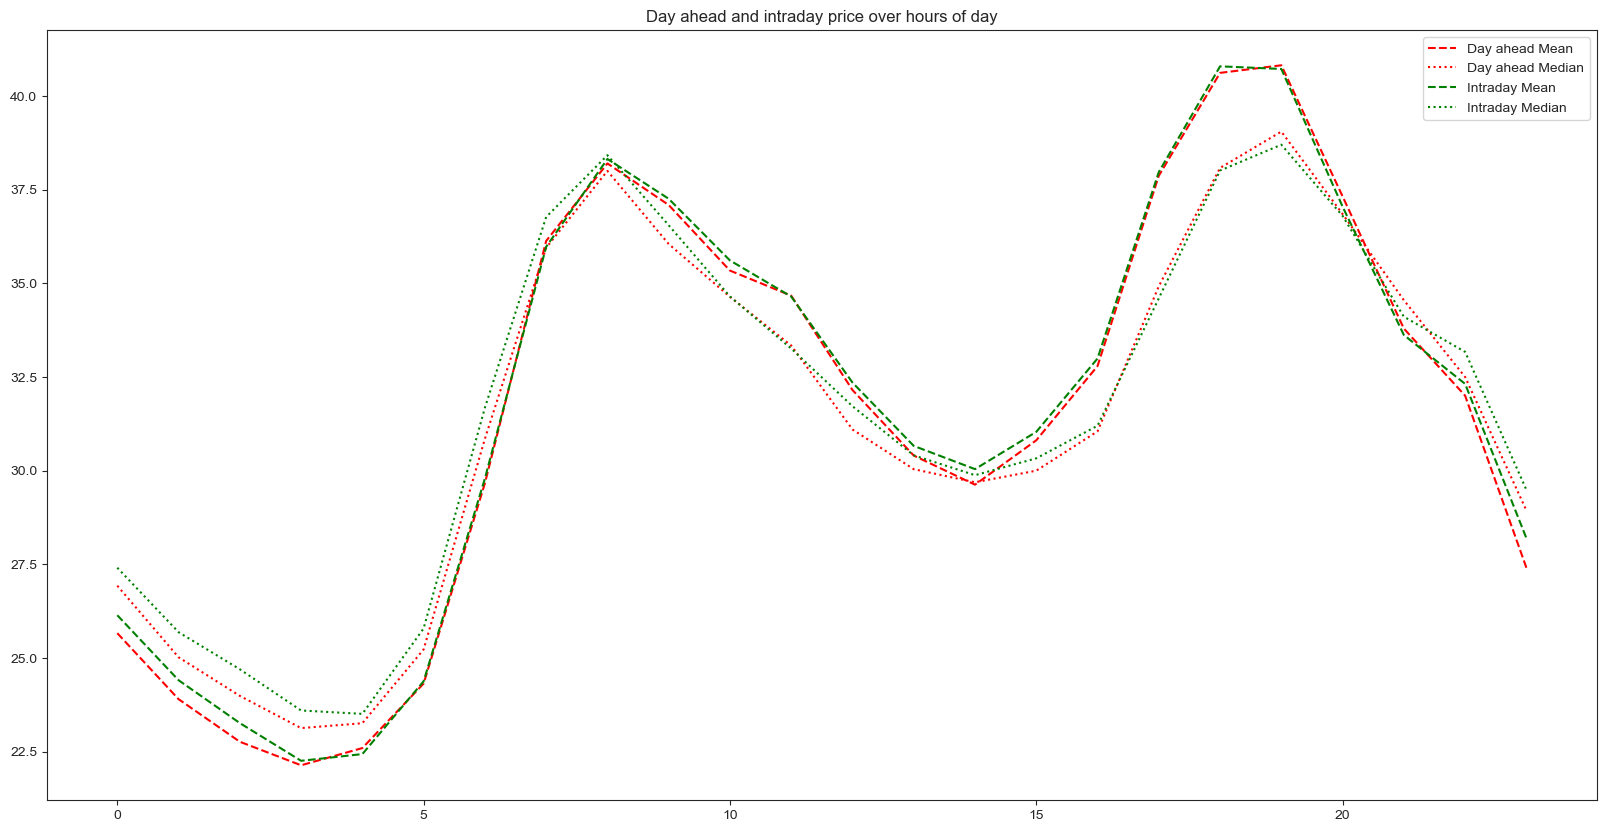

In [94]:
data_grouped_hour_mean = data_grouped_hour.mean()
data_grouped_hour_median = data_grouped_hour.median()
data_grouped_hour_min = data_grouped_hour.min()
data_grouped_hour_max = data_grouped_hour.max()

x = data_grouped_hour_mean.index
y1 = data_grouped_hour_min["day_ahead_price"]
y2 = data_grouped_hour_mean["day_ahead_price"]
y3 = data_grouped_hour_median["day_ahead_price"]
y4 = data_grouped_hour_max["day_ahead_price"]
y5 = data_grouped_hour_min["intraday_price"]
y6 = data_grouped_hour_mean["intraday_price"]
y7 = data_grouped_hour_median["intraday_price"]
y8 = data_grouped_hour_max["intraday_price"]

f, (ax) = plt.subplots(1, 1, figsize=(20, 10), sharex=True)
#ax.plot(x, y1, label="Day ahead Min", c="r", linestyle='--')
ax.plot(x, y2, label="Day ahead Mean", c="r", linestyle='--')
ax.plot(x, y3, label="Day ahead Median", c="r", linestyle=':')
#ax.plot(x, y4, label="Day ahead Max", c="r", linestyle='-.')
#ax.plot(x, y5, label="Intraday Min", c="g", linestyle='--')
ax.plot(x, y6, label="Intraday Mean", c="g", linestyle='--')
ax.plot(x, y7, label="Intraday Median", c="g", linestyle=':')
#ax.plot(x, y8, label="Intraday Max", c="g", linestyle='-.')
ax.set_title("Day ahead and intraday price over hours of day")

plt.legend()
plt.show()

In [95]:
"""data_grouped_hour = data[['hour','day_ahead_price','intraday_price','season']].groupby([data['hour'], data['season']])
data_grouped_hour_mean = data_grouped_hour.mean()
data_grouped_hour_median = data_grouped_hour.median()
data_grouped_hour_min = data_grouped_hour.min()
data_grouped_hour_max = data_grouped_hour.max()
print (data_grouped_hour_mean.index)
x = data_grouped_hour_mean.index
y1 = data_grouped_hour_min["day_ahead_price"]
y2 = data_grouped_hour_mean["day_ahead_price"]
y3 = data_grouped_hour_median["day_ahead_price"]
y4 = data_grouped_hour_max["day_ahead_price"]
y5 = data_grouped_hour_min["intraday_price"]
y6 = data_grouped_hour_mean["intraday_price"]
y7 = data_grouped_hour_median["intraday_price"]
y8 = data_grouped_hour_max["intraday_price"]

f, (ax) = plt.subplots(1, 1, figsize=(20, 10), sharex=True)
#ax.plot(x, y1, label="Day ahead Min", c="r", linestyle='--')
ax.plot(x, y2, label="Day ahead Mean", c="r", linestyle='--')
#ax.plot(x, y3, label="Day ahead Median", c="r", linestyle=':')
#ax.plot(x, y4, label="Day ahead Max", c="r", linestyle='-.')
#ax.plot(x, y5, label="Intraday Min", c="g", linestyle='--')
ax.plot(x, y6, label="Intraday Mean", c="g", linestyle='--')
#ax.plot(x, y7, label="Intraday Median", c="g", linestyle=':')
#ax.plot(x, y8, label="Intraday Max", c="g", linestyle='-.')
ax.set_title("Day ahead and intraday price over time")

plt.legend()
plt.show()"""

'data_grouped_hour = data[[\'hour\',\'day_ahead_price\',\'intraday_price\',\'season\']].groupby([data[\'hour\'], data[\'season\']])\ndata_grouped_hour_mean = data_grouped_hour.mean()\ndata_grouped_hour_median = data_grouped_hour.median()\ndata_grouped_hour_min = data_grouped_hour.min()\ndata_grouped_hour_max = data_grouped_hour.max()\nprint (data_grouped_hour_mean.index)\nx = data_grouped_hour_mean.index\ny1 = data_grouped_hour_min["day_ahead_price"]\ny2 = data_grouped_hour_mean["day_ahead_price"]\ny3 = data_grouped_hour_median["day_ahead_price"]\ny4 = data_grouped_hour_max["day_ahead_price"]\ny5 = data_grouped_hour_min["intraday_price"]\ny6 = data_grouped_hour_mean["intraday_price"]\ny7 = data_grouped_hour_median["intraday_price"]\ny8 = data_grouped_hour_max["intraday_price"]\n\nf, (ax) = plt.subplots(1, 1, figsize=(20, 10), sharex=True)\n#ax.plot(x, y1, label="Day ahead Min", c="r", linestyle=\'--\')\nax.plot(x, y2, label="Day ahead Mean", c="r", linestyle=\'--\')\n#ax.plot(x, y3, la

             season  hour  day_ahead_price  intraday_price
season hour                                               
0      0          0     0        25.193702       26.260110
       1          0     1        23.090110       24.432099
       2          0     2        21.553370       23.045746
       3          0     3        21.249227       21.907403
       4          0     4        22.164586       22.522597


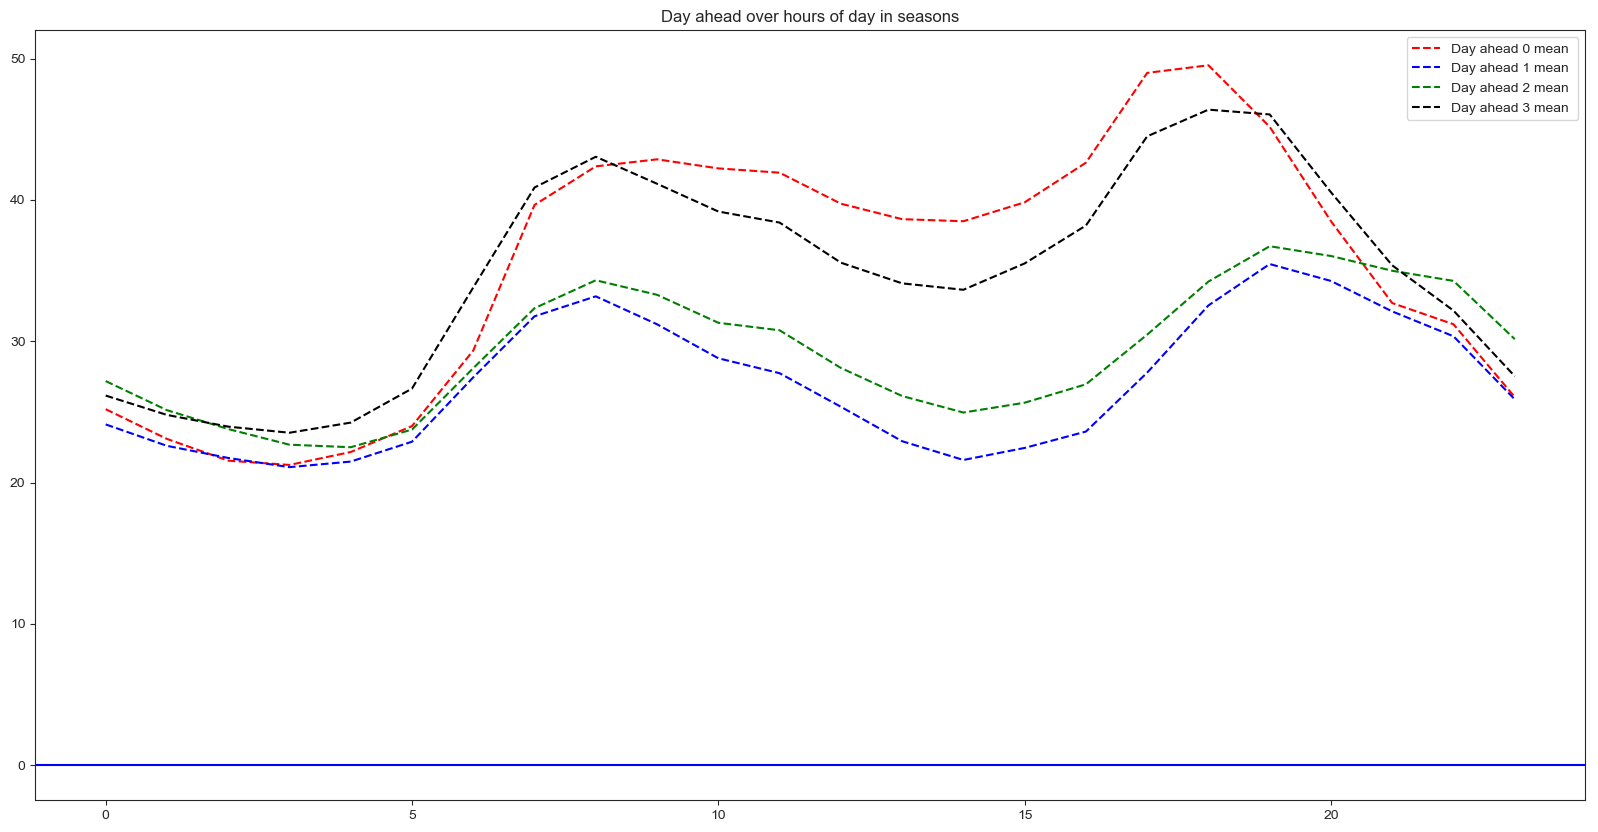

In [112]:
data_grouped_mean = data[['season', 'hour', 'day_ahead_price', 'intraday_price']].groupby([data['season'], data["hour"]]).mean()
print(data_grouped_mean.head())
x = range(24)
y1 = data_grouped_mean.loc[(data_grouped_mean.season==0), "day_ahead_price"]
y2 = data_grouped_mean.loc[(data_grouped_mean.season==1), "day_ahead_price"]
y3 = data_grouped_mean.loc[(data_grouped_mean.season==2), "day_ahead_price"]
y4 = data_grouped_mean.loc[(data_grouped_mean.season==3), "day_ahead_price"]


fig1, (ax) = plt.subplots(1, 1, figsize=(20, 10), sharex=True)
ax.plot(x, y1, label="Day ahead 0 mean", c="r", linestyle='--')
ax.plot(x, y2, label="Day ahead 1 mean", c="b", linestyle='--')
ax.plot(x, y3, label="Day ahead 2 mean ", c="g", linestyle='--')
ax.plot(x, y4, label="Day ahead 3 mean", c="black", linestyle='--')


ax.set_title("Day ahead over hours of day in seasons")
ax.axhline(y=0, color='b')
plt.legend()
plt.show()